# Support Vector Machines


<font size="3">**Support Vector Machines(SVM)** is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best divides a dataset into classes. For a 1D space, this hyperplane is a point, for a 2D space, the hyperplane is a line, and for higher dimensions, it can be a plane or a hyperplane.

#### Key Concepts

1. **Hyperplane**: A decision boundary that separates data points of different classes.
 
2. **Support Vectors**: Data points that are closest to the hyperplane and influence its position.

3. **Margin**: The distance between the hyperplane and the nearest support vectors. SVM tries to maximize this margin.



### Installing Necessary Libraries

If you have **not** installed `numpy`,`pandas`,`scikit-learn`,`matplotlib` and `seaborn` libraries before, please run the below cell by removing the `#`.

In [124]:
#!pip install numpy pandas scikit-learn matplotlib seaborn

### Importing Necessary Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

### Loading the Dataset

<font size="3">For simplicity and explanational purposes, we will be using the Iris dataset which is included in the Scikit-learn library

<font size="3">The Iris dataset is a famous dataset for pattern recognition. It includes 150 samples of iris flowers from three species (Iris setosa, Iris versicolor, and Iris virginica). Each sample has four features: sepal length, sepal width, petal length, and petal width.

In [16]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a pandas DataFrame for easier data manipulation
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

### Viewing the Dataset

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Preprocessing

Before training the SVM model, we need to preprocess the data. This involves **splitting the data into training and testing sets** and **standardizing** the feature values.

#### Defining Features and Target

In [83]:
X = data[iris.feature_names]
y = data['target']

#### Split the dataset into training and testing sets

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Purpose:** This command splits the dataset into training and testing sets.

**Explanation:**
- `train_test_split(X, y, test_size=0.2)`: This function from the scikit-learn library splits the feature matrix (`X`) and target vector (`y`) into training and testing subsets.
- `X_train` and `y_train`: These will hold the training data (80% of the dataset if `test_size=0.2`).
- `X_test` and `y_test`: These will hold the testing data (20% of the dataset if `test_size=0.2`).
- `test_size=0.2`: This parameter specifies that 20% of the data should be used for testing, and the remaining 80% will be used for training.
- `random_state=42` :  Controls the shuffling applied to the data before applying the split.
    Passing an integer will give reproducible output across multiple function calls.

#### Standardizing the features

##### Why?
- Many machine learning algorithms (specially SVM) perform better when features are on a similar scale.
- It ensures that each feature contributes equally to the result, preventing features with larger scales from dominating.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Purpose:** : Standardizes the features. The standard score of a sample `x` is calculated as:

 $$z = \frac{(x - \mu)}{\sigma}$$

where $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation of the training samples.

**Explanation:**
- `StandardScaler()` : The tool that is used to perform standardization.
- `fit_transform(X_train)` : First fits the scaler on X_train (calculates the mean and standard deviation for each feature using the training data) and then transforms X_train (applies the calculated mean and standard deviation to standardize the training data).
- `transform(X_test)` : Applies the same mean and standard deviation calculated from the training data to standardize the test data. It is crucial to use the same scaler fitted on the training data to ensure that the test data is transformed in the same way.

### Training the SVM Model

Now, we will train the SVM model using the training data. We'll use the **SVC (Support Vector Classifier)** class from **scikit-learn**.

In [27]:
# Creating an instance of the SVM Classifier
svm = SVC(kernel="linear", C=1.0, random_state=42)

# Train the SVM Model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**Key Hyperparamters**

- `'C'` **Regularization parameter** : A smaller C value allows the SVM to have a larger margin with more misclassified points, which might result in better generalization. Conversely, a larger C value aims for a smaller margin with fewer misclassifications.
- `'kernel'` **Kernel type** : Specifies the kernel type to be used in the algorithm. The kernel function transforms the input data into a higher-dimensional space to make it possible to perform linear separation. Common kernels include:
  
    - `'linear'` : Linear kernel.
    - `'poly'` : Polynomial kernel.
    - `'rbf'` : Radial Basis Function (Gaussian) kernel.

### Making Predictions

After training the model, we can use it to make predictions on the test data.

In [28]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

### Evaulating the Model

To evaluate the performance of the SVM model, we will use metrics like **accuracy**, **confusion matrix**, and **classification report**.

Accuracy: 0.9666666666666667
Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confucdsion Matrix


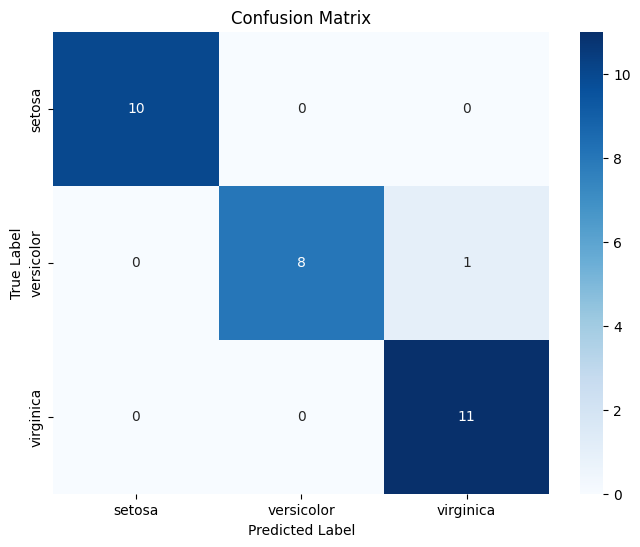

In [39]:
# Calculating the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
cls_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report")
print(cls_report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plotting the Confusion matrix as a heatmap
print("Confucdsion Matrix")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Trying out other kernals and different regularization parameters

<font size=3>Visualizing desicion boundaries is quite helpful in understanding how the SVM model seperates classes with various kernals and regularization parameters. Since the Iris dataset has four features, we will use only two features (**petal length and pet width**) for visualization.

In [237]:
# Selecting the 3rd and 4th columns as features and setting the target
X_new = data.iloc[:, [2,3]].values
y_new = data["target"].values

# Creating different models we want to test
models = (
    SVC(kernel="linear", C=1),
    SVC(kernel="linear", C=100),
    SVC(kernel="poly", degree=5, C=5),
    SVC(kernel="poly", degree=10, C=5),
    SVC(kernel="rbf", gamma=0.5, C=10),
    SVC(kernel="rbf", gamma=5, C=10)
)
# Training the model with selecteed data
models = (clf.fit(X_new, y_new) for clf in models)

# Defining plot names
plot_names = [
    "Linear kernel C=1",
    "Linear kernel C=100",
    "Polynomial kernal Degree=5, C=5",
    "Polynomial kernal Degree=10, C=5",
    "Rbf kernel gamma=0.5, C=10",
    "Rbf kernel gamma=5, C=10"
]

In [238]:
# Defining a function to plot decision boundaries for different models
def plot_decision_boundaries(X, y, models, titles):

    fig, axes = plt.subplots(3,2, figsize=(10,12))
    axes = axes.flatten()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    for ax, model, title in zip(axes, models, titles):

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.8, cmap='Set3')

        ax.set_xlabel('Petal length')
        ax.set_ylabel('Petal width')
        ax.set_title(title)
        ax.scatter(X[:,0], X[:,1] , c=y, s=30, cmap='terrain', edgecolors='k')
    
    plt.tight_layout()
    plt.show()
        

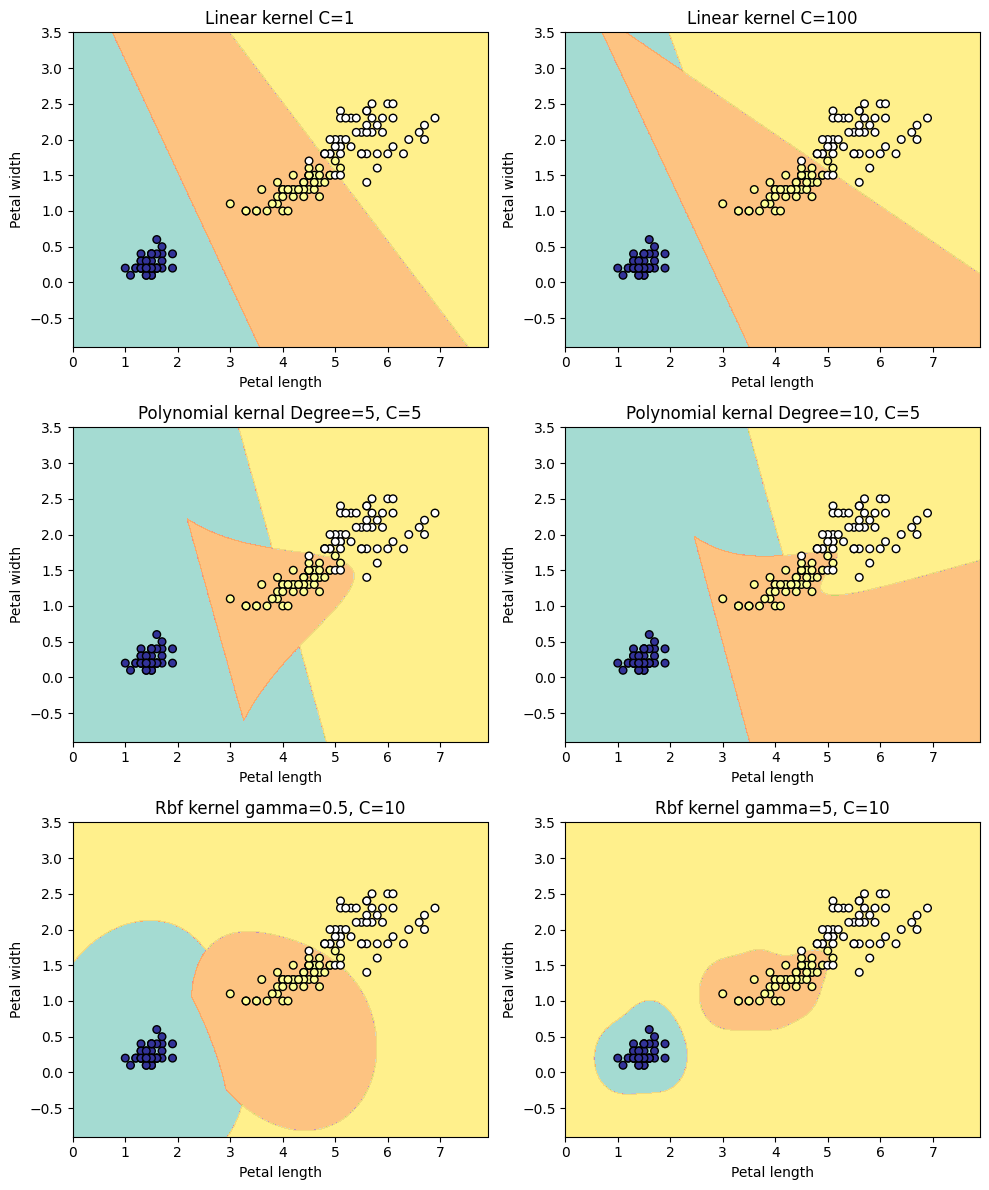

In [239]:
# Plotting the decision boundaries
plot_decision_boundaries(X_new, y_new, models, plot_names)